In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random
from scipy.stats import linregress
import seaborn as sns


Creating Dataframes with `pandas`
=====

In [2]:
#Finances
finance_df = pd.read_csv("resources/campus_finances.csv")
finance_df.head()

,DISTRICT NUMBER,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,"$4,122,552","$4,122,552","$1,114,179","$1,176,283",$0,"$250,168","$215,239",...,"$5,829","$70,703","$70,703","$421,865","$421,865","$145,130","$156,886","$4,907,206","$5,348,377",569
1,1902,CAYUGA ISD,2008,"$3,641,351","$3,641,351","$1,845,232","$2,350,131",$0,"$1,852,221","$183,293",...,"$15,000","$75,304","$210,304",$0,$0,"$647,852","$632,398","$5,391,975","$8,274,772",580
2,1902,CAYUGA ISD,2009,"$3,319,164","$3,319,164","$1,950,169","$2,473,373",$0,"$1,714,988","$123,568",...,$0,"$166,251","$166,251",$0,$0,"$722,766","$803,313","$6,006,273","$8,819,439",594
3,1902,CAYUGA ISD,2010,"$3,222,688","$3,222,688","$2,302,369","$2,917,268",$0,"$2,851,372","$161,664",...,"$63,586","$90,462","$168,462",$0,$0,"$1,498,127","$1,582,837","$6,634,887","$10,471,817",628
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,152,618","$2,439,570","$3,091,438",$0,"$2,687,377","$134,887",...,"$30,213","$96,141","$168,750",$0,$0,"$261,902","$272,638","$5,239,822","$8,883,753",606


In [3]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Columns: 142 entries, DISTRICT NUMBER to FALL SURVEY ENROLLMENT
dtypes: int64(2), object(140)
memory usage: 21.0+ MB


In [4]:
#Dropout rates
dropout_df = pd.read_csv("resources/dropout_rates.csv")
dropout_df.head()

C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\1436584448.py:2: DtypeWarning: Columns (13,91,94) have mixed types. Specify dtype option on import or set low_memory=False.
  dropout_df = pd.read_csv("resources/dropout_rates.csv")


,CALC_FOR_STATE_ACCT,GRADESPAN,Campus Number,Campus Name,DISTRICT,DISTNAME,COUNTY,CNTYNAME,REGION,REGNNAME,...,Section 504 Denominator,Section 504 Numerator,Section 504 Dropout Rate,Special Education Denominator,Special Education Numerator,Special Education Dropout Rate,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,No,712,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,30,0,0,30,0,0,NaN,NaN,NaN,NaN
1,Yes,712,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,30,0,0,30,0,0,NaN,NaN,NaN,NaN
2,No,912,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,30,0,0,30,0,0,NaN,NaN,NaN,NaN
3,Yes,912,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,30,0,0,30,0,0,NaN,NaN,NaN,NaN
4,No,712,1902041,Cayuga Middle,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,16,0,0,24,0,0,NaN,NaN,NaN,NaN


In [5]:
#ACT scores
act_data_df = pd.read_csv("resources/ACT_data.csv")
act_data_df

,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,Unnamed: 15
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0,NaN
1,African American,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
2,American Indian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
3,Asian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
4,Hispanic,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88459,Not Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,12.5,15.6,14.8,16.7,15.0,NaN
88460,Missing Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN,NaN
88461,Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN,NaN
88462,Not Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,12.3,15.6,14.8,16.7,15.0,NaN


In [6]:
#SAT scores
sat_data_df = pd.read_csv("resources/SAT_data.csv")
sat_data_df.head()

,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County Number,County Name,Region,Region Name,ERW,SAT Math,SAT Total,Unnamed: 13,Unnamed: 14
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,513.0,496.0,1009.0,NaN,NaN
1,African American,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
2,American Indian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
3,Asian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
4,Hispanic,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,535.0,480.0,1015.0,NaN,NaN


In [7]:
#Campus descriptions (size)
descriptions_df = pd.read_csv("resources/campus_descriptions.csv")
descriptions_df.head()

,Campus Name,Campus Number,Campus Type,Campus Type Description
0,21ST CENTURY EARLY LEARNING FOUNDATIONS ACADEMY,108913118,21,21-Suburb: Large
1,2ND H S IN THE DISTRICT,152906004,41,41-Rural: Fringe
2,3D ACADEMY,108902006,21,21-Suburb: Large
3,A & M CONS H S,21901001,12,12-City: Mid-size
4,A & M CONSOLIDATED MIDDLE,21901042,12,12-City: Mid-size


In [8]:
# Expidenture
expidenture_df = pd.read_csv("resources/expidenture_data.csv")
expidenture_df.head()

,District Number,District Name,2005-2006,Unnamed: 3,Unnamed: 4,2006-2007,Unnamed: 6,Unnamed: 7,2007-2008,Unnamed: 9,...,Unnamed: 34,2016-2017,Unnamed: 36,Unnamed: 37,2017-2018,Unnamed: 39,Unnamed: 40,2018-2019,Unnamed: 42,Unnamed: 43
0,NaN,NaN,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,All Funds Operating Expenditures per Student,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,All Funds Operating Expenditures per Student,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,...,All Funds Operating Expenditures per Student,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,All Funds Operating Expenditures per Student,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,All Funds Operating Expenditures per Student,"Total Operating Expenditures, All Funds 1",Enrollment (membership)2,All Funds Operating Expenditures per Student
1,001902,CAYUGA ISD,"$4,419,577",582,"$7,594","$4,693,094",569,"$8,248","$7,417,070",580,...,"$14,924","$8,331,442",576,"$14,464","$8,325,066",575,"$14,478","$8,558,886",564,"$15,175"
2,001903,ELKHART ISD,"$8,655,605","1,294","$6,689","$8,955,664","1,319","$6,790","$9,559,209","1,375",...,"$8,953","$11,147,631","1,267","$8,798","$11,503,115","1,233","$9,329","$11,696,322","1,254","$9,327"
3,001904,FRANKSTON ISD,"$6,475,854",797,"$8,125","$6,584,942",789,"$8,346","$7,085,955",801,...,"$9,170","$8,218,507",846,"$9,715","$8,406,173",872,"$9,640","$8,802,724",803,"$10,962"
4,001906,NECHES ISD,"$2,641,035",329,"$8,027","$2,721,193",352,"$7,731","$2,981,438",361,...,"$10,626","$3,979,099",377,"$10,555","$4,046,814",360,"$11,241","$4,021,890",366,"$10,989"


SAT and ACT scores merging
====

In [9]:
    #Creating a data frame with only sat score and district name
sat_data_df


,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County Number,County Name,Region,Region Name,ERW,SAT Math,SAT Total,Unnamed: 13,Unnamed: 14
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,513.0,496.0,1009.0,NaN,NaN
1,African American,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
2,American Indian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
3,Asian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
4,Hispanic,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,535.0,480.0,1015.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95014,Not Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,442.0,423.0,865.0,NaN,NaN
95015,Missing Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN
95016,Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN
95017,Not Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,440.0,422.0,862.0,NaN,NaN


In [10]:
sat_data_df = sat_data_df[sat_data_df["Group"] == "All Students"]
sat_data_df

,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County Number,County Name,Region,Region Name,ERW,SAT Math,SAT Total,Unnamed: 13,Unnamed: 14
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,513.0,496.0,1009.0,NaN,NaN
57,All Students,1903001,442190,Elkhart HS,1903,Elkhart ISD,1,Anderson County,7,Kilgore,514.0,507.0,1021.0,NaN,NaN
114,All Students,1904001,442590,Frankston HS,1904,Frankston ISD,1,Anderson County,7,Kilgore,511.0,505.0,1016.0,NaN,NaN
171,All Students,1906002,445015,Neches HS,1906,Neches ISD,1,Anderson County,7,Kilgore,565.0,532.0,1097.0,NaN,NaN
228,All Students,1907001,445325,Palestine HS,1907,Palestine ISD,1,Anderson County,7,Kilgore,544.0,541.0,1085.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94734,All Students,251901001,441955,Denver City HS,251901,Denver City ISD,251,Yoakum County,17,Lubbock,494.0,476.0,970.0,NaN,NaN
94791,All Students,252901001,442910,Graham HS,252901,Graham ISD,252,Young County,9,Wichita Falls,563.0,538.0,1101.0,NaN,NaN
94848,All Students,252903001,445225,Olney HS,252903,Olney ISD,252,Young County,9,Wichita Falls,508.0,536.0,1044.0,NaN,NaN
94905,All Students,253901001,447715,Zapata HS,253901,Zapata County ISD,253,Zapata County,1,Edinburg,NaN,NaN,NaN,NaN,NaN


In [11]:
sat_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County Number", "Unnamed: 13", "Unnamed: 14"], axis=1,inplace=True )
sat_data_df

C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\4165562538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County Number", "Unnamed: 13", "Unnamed: 14"], axis=1,inplace=True )


,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,513.0,496.0,1009.0
57,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,514.0,507.0,1021.0
114,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,511.0,505.0,1016.0
171,Neches HS,Neches ISD,Anderson County,7,Kilgore,565.0,532.0,1097.0
228,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,544.0,541.0,1085.0
...,...,...,...,...,...,...,...,...
94734,Denver City HS,Denver City ISD,Yoakum County,17,Lubbock,494.0,476.0,970.0
94791,Graham HS,Graham ISD,Young County,9,Wichita Falls,563.0,538.0,1101.0
94848,Olney HS,Olney ISD,Young County,9,Wichita Falls,508.0,536.0,1044.0
94905,Zapata HS,Zapata County ISD,Zapata County,1,Edinburg,NaN,NaN,NaN


In [12]:
sat_data_df= sat_data_df.dropna()
sat_data_df

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,513.0,496.0,1009.0
57,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,514.0,507.0,1021.0
114,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,511.0,505.0,1016.0
171,Neches HS,Neches ISD,Anderson County,7,Kilgore,565.0,532.0,1097.0
228,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,544.0,541.0,1085.0
...,...,...,...,...,...,...,...,...
94620,Alba-Golden HS,Alba-Golden ISD,Wood County,7,Kilgore,675.0,645.0,1320.0
94734,Denver City HS,Denver City ISD,Yoakum County,17,Lubbock,494.0,476.0,970.0
94791,Graham HS,Graham ISD,Young County,9,Wichita Falls,563.0,538.0,1101.0
94848,Olney HS,Olney ISD,Young County,9,Wichita Falls,508.0,536.0,1044.0


In [13]:
act_data_df

,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,Unnamed: 15
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0,NaN
1,African American,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
2,American Indian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
3,Asian,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
4,Hispanic,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88459,Not Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,12.5,15.6,14.8,16.7,15.0,NaN
88460,Missing Migrant,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN,NaN
88461,Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,NaN,NaN,NaN,NaN,NaN,NaN
88462,Not Military-Connected,254902001,444030,La Pryor HS,254902,La Pryor ISD,254,Zavala County,20,San Antonio,12.3,15.6,14.8,16.7,15.0,NaN


In [14]:
act_data_df= act_data_df[act_data_df["Group"] == "All Students"]
act_data_df

,Group,Campus Number,AI Code,Campus Name,District Number,District Name,County,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,Unnamed: 15
0,All Students,1902001,441165,Cayuga HS,1902,Cayuga ISD,1,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0,NaN
57,All Students,1903001,442190,Elkhart HS,1903,Elkhart ISD,1,Anderson County,7,Kilgore,19.0,21.5,22.5,21.5,21.0,NaN
114,All Students,1904001,442590,Frankston HS,1904,Frankston ISD,1,Anderson County,7,Kilgore,27.5,24.0,27.0,25.5,26.0,NaN
171,All Students,1907001,445325,Palestine HS,1907,Palestine ISD,1,Anderson County,7,Kilgore,20.6,21.5,22.7,22.2,22.0,NaN
228,All Students,1908002,445328,Westwood HS,1908,Westwood ISD,1,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88179,All Students,252902002,445065,Newcastle School,252902,Newcastle ISD,252,Young County,9,Wichita Falls,17.6,19.8,17.8,17.7,18.2,NaN
88236,All Students,252903001,445225,Olney HS,252903,Olney ISD,252,Young County,9,Wichita Falls,17.7,19.8,19.0,20.0,19.3,NaN
88293,All Students,253901001,447715,Zapata HS,253901,Zapata County ISD,253,Zapata County,1,Edinburg,15.2,16.3,18.5,17.8,17.0,NaN
88350,All Students,254901001,441650,Crystal City HS,254901,Crystal City ISD,254,Zavala County,20,San Antonio,14.1,15.1,17.4,15.3,15.7,NaN


In [15]:
act_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County", "Unnamed: 15"], axis=1,inplace=True )
act_data_df

C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\3407724354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County", "Unnamed: 15"], axis=1,inplace=True )


,Campus Name,District Name,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0
57,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,19.0,21.5,22.5,21.5,21.0
114,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,27.5,24.0,27.0,25.5,26.0
171,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,20.6,21.5,22.7,22.2,22.0
228,Westwood HS,Westwood ISD,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
88179,Newcastle School,Newcastle ISD,Young County,9,Wichita Falls,17.6,19.8,17.8,17.7,18.2
88236,Olney HS,Olney ISD,Young County,9,Wichita Falls,17.7,19.8,19.0,20.0,19.3
88293,Zapata HS,Zapata County ISD,Zapata County,1,Edinburg,15.2,16.3,18.5,17.8,17.0
88350,Crystal City HS,Crystal City ISD,Zavala County,20,San Antonio,14.1,15.1,17.4,15.3,15.7


In [16]:
act_data_df.dropna()
act_data_df

,Campus Name,District Name,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0
57,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,19.0,21.5,22.5,21.5,21.0
114,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,27.5,24.0,27.0,25.5,26.0
171,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,20.6,21.5,22.7,22.2,22.0
228,Westwood HS,Westwood ISD,Anderson County,7,Kilgore,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
88179,Newcastle School,Newcastle ISD,Young County,9,Wichita Falls,17.6,19.8,17.8,17.7,18.2
88236,Olney HS,Olney ISD,Young County,9,Wichita Falls,17.7,19.8,19.0,20.0,19.3
88293,Zapata HS,Zapata County ISD,Zapata County,1,Edinburg,15.2,16.3,18.5,17.8,17.0
88350,Crystal City HS,Crystal City ISD,Zavala County,20,San Antonio,14.1,15.1,17.4,15.3,15.7


In [17]:
#Merging SAT and ACT on district 
act_sat_df = pd.merge(sat_data_df, act_data_df, how="left", on=["Campus Name", "District Name", "County Name", "Region", "Region Name"])
act_sat_df

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
3,Neches HS,Neches ISD,Anderson County,7,Kilgore,565.0,532.0,1097.0,NaN,NaN,NaN,NaN,NaN
4,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,Alba-Golden HS,Alba-Golden ISD,Wood County,7,Kilgore,675.0,645.0,1320.0,19.9,20.4,21.4,21.6,20.9
1570,Denver City HS,Denver City ISD,Yoakum County,17,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0
1571,Graham HS,Graham ISD,Young County,9,Wichita Falls,563.0,538.0,1101.0,18.9,20.8,21.5,21.6,20.8
1572,Olney HS,Olney ISD,Young County,9,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3


## How to select only a district

In [18]:
#In case we only need a district
cayuga_ISD = act_sat_df.loc[act_sat_df["District Name"] == "Cayuga ISD" , :]
cayuga_ISD

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0


## How to select only a city

In [19]:
# In case we only want a city
Austin_scores = act_sat_df.loc[act_sat_df["Region Name"] == "Austin" , :]
Austin_scores

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
29,Bastrop HS,Bastrop ISD,Bastrop County,13,Austin,454.0,446.0,900.0,18.7,17.8,21.2,20.2,19.5
30,Cedar Creek HS,Bastrop ISD,Bastrop County,13,Austin,454.0,445.0,899.0,20.6,20.6,23.8,22.6,22.2
31,Colorado River Collegiate Academy,Bastrop ISD,Bastrop County,13,Austin,544.0,552.0,1095.0,NaN,NaN,NaN,NaN,NaN
32,Elgin HS,Elgin ISD,Bastrop County,13,Austin,475.0,461.0,935.0,15.2,17.2,18.4,18.5,17.4
33,Smithville HS,Smithville ISD,Bastrop County,13,Austin,515.0,496.0,1012.0,20.3,21.5,22.3,19.5,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Vista Ridge HS,Leander ISD,Williamson County,13,Austin,561.0,557.0,1119.0,23.7,23.6,24.7,23.7,24.0
1549,Rouse HS,Leander ISD,Williamson County,13,Austin,543.0,518.0,1061.0,23.4,22.2,25.3,23.2,23.6
1550,Vandegrift HS,Leander ISD,Williamson County,13,Austin,599.0,599.0,1197.0,26.4,25.4,27.4,26.0,26.4
1551,Glenn HS,Leander ISD,Williamson County,13,Austin,497.0,480.0,977.0,20.3,20.8,22.2,21.2,21.3


In [20]:
#Names of all the districts
district_names_list = act_sat_df["District Name"].unique()
district_names_list


array(['Cayuga ISD', 'Elkhart ISD', 'Frankston ISD', 'Neches ISD',
       'Palestine ISD', 'Westwood ISD', 'Slocum ISD', 'Andrews ISD',
       'Pineywoods Community Academy', 'Hudson ISD', 'Lufkin ISD',
       'Huntington ISD', 'Diboll ISD', 'Zavalla ISD', 'Central ISD',
       'Aransas County ISD', 'Holliday ISD', 'Windthorst ISD',
       'Charlotte ISD', 'Jourdanton ISD', 'Lytle ISD', 'Pleasanton ISD',
       'Poteet ISD', 'Bellville ISD', 'Sealy ISD', 'Brazos ISD',
       'Muleshoe ISD', 'Medina ISD', 'Bandera ISD', 'Bastrop ISD',
       'Elgin ISD', 'Smithville ISD', 'McDade ISD', 'Seymour ISD',
       'Beeville ISD', 'Pettus ISD', 'Skidmore-Tynan ISD',
       'Priority Charter Schools', 'Orenda Charter School', 'Academy ISD',
       'Bartlett ISD', 'Belton ISD', 'Holland ISD', 'Killeen ISD',
       'Rogers ISD', 'Salado ISD', 'Temple ISD', 'Troy ISD',
       'Por Vida Academy', 'George Gervin Academy',
       'New Frontiers Public Schools Inc', 'Southwest Preparatory School',
    

In [21]:
austin_districts = Austin_scores["District Name"].value_counts()
austin_districts

District Name
Austin ISD                          14
Leander ISD                          7
Round Rock ISD                       7
Hays CISD                            4
Pflugerville ISD                     4
Georgetown ISD                       3
Manor ISD                            3
Harmony Public Schools-Central       3
Bastrop ISD                          3
Taylor ISD                           2
Burnet CISD                          2
Del Valle ISD                        2
Lockhart ISD                         1
Lago Vista ISD                       1
University of Texas University       1
Chaparral Star Academy               1
Cedars International Academy         1
Valere Public Schools                1
Blanco ISD                           1
Johnson City ISD                     1
Bartlett ISD                         1
Eanes ISD                            1
Lake Travis ISD                      1
Luling ISD                           1
Meridian World School LLC            1
Florence IS

# Finance

In [22]:
finance_df

,DISTRICT NUMBER,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,"$4,122,552","$4,122,552","$1,114,179","$1,176,283",$0,"$250,168","$215,239",...,"$5,829","$70,703","$70,703","$421,865","$421,865","$145,130","$156,886","$4,907,206","$5,348,377",569
1,1902,CAYUGA ISD,2008,"$3,641,351","$3,641,351","$1,845,232","$2,350,131",$0,"$1,852,221","$183,293",...,"$15,000","$75,304","$210,304",$0,$0,"$647,852","$632,398","$5,391,975","$8,274,772",580
2,1902,CAYUGA ISD,2009,"$3,319,164","$3,319,164","$1,950,169","$2,473,373",$0,"$1,714,988","$123,568",...,$0,"$166,251","$166,251",$0,$0,"$722,766","$803,313","$6,006,273","$8,819,439",594
3,1902,CAYUGA ISD,2010,"$3,222,688","$3,222,688","$2,302,369","$2,917,268",$0,"$2,851,372","$161,664",...,"$63,586","$90,462","$168,462",$0,$0,"$1,498,127","$1,582,837","$6,634,887","$10,471,817",628
4,1902,CAYUGA ISD,2011,"$3,152,618","$3,152,618","$2,439,570","$3,091,438",$0,"$2,687,377","$134,887",...,"$30,213","$96,141","$168,750",$0,$0,"$261,902","$272,638","$5,239,822","$8,883,753",606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19414,254902,LA PRYOR ISD,2018,"$1,144,796","$1,144,796","$4,287,058","$4,327,329","$393,958","$933,771","$111,578",...,$0,"$40,409","$40,409","$304,550","$476,400","$120,355","$120,355","$6,288,071","$7,051,511",468
19415,254902,LA PRYOR ISD,2019,"$1,361,156","$1,361,156","$4,887,886","$4,982,020","$459,994","$908,996","$122,164",...,$0,"$31,611","$31,611","$303,088","$471,938","$86,719","$86,719","$6,391,578","$7,128,955",503
19416,254902,LA PRYOR ISD,2020,"$1,675,978","$1,675,978","$4,762,288","$4,802,265","$400,774","$867,140","$115,587",...,$0,"$33,424","$33,424","$315,972","$486,822","$1,091,106","$1,091,106","$7,670,125","$8,367,435",505
19417,254902,LA PRYOR ISD,2021,"$2,338,850","$2,338,850","$5,648,810","$5,693,340","$467,621","$1,137,456","$130,199",...,$0,"$38,596","$38,596","$265,223","$437,923","$792,382","$792,382","$8,117,084","$8,928,565",521


In [23]:
finance_df= finance_df[finance_df["YEAR"] == 2022]
finance_df

,DISTRICT NUMBER,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
15,1902,CAYUGA ISD,2022,"$3,094,212","$3,094,212","$4,197,261","$4,204,460","$91,436","$2,647,825","$221,819",...,$0,"$267,140","$794,807",$0,$0,"$312,480","$312,480","$6,736,571","$10,812,870",574
31,1903,ELKHART ISD,2022,"$3,224,720","$3,224,720","$9,529,732","$9,840,988","$164,299","$2,411,332","$173,822",...,$0,"$425,056","$425,056","$59,724","$1,005,774","$2,035,874","$2,243,547","$14,672,331","$18,404,158","1,150"
47,1904,FRANKSTON ISD,2022,"$2,870,023","$2,870,023","$6,885,445","$6,903,713",$0,"$2,734,519","$78,103",...,$0,"$348,216","$348,216","$23,698","$801,133","$302,134","$627,431","$9,524,268","$13,030,093",808
63,1906,NECHES ISD,2022,"$1,199,703","$1,199,703","$2,938,953","$2,971,286","$43,644","$901,938","$26,941",...,"$97,240","$93,143","$93,143","$19,148","$347,361","$164,196","$168,895","$4,322,342","$5,622,491",342
79,1907,PALESTINE ISD,2022,"$12,493,095","$12,493,095","$21,888,639","$22,548,859","$839,081","$10,213,015","$1,360,597",...,"$4,262,339","$325,755","$325,755","$298,127","$4,126,802","$4,034,161","$4,040,161","$43,954,489","$58,282,716","3,360"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,252902,NEWCASTLE ISD,2022,"$767,151","$767,151","$2,276,362","$2,283,324",$0,"$815,187","$101,840",...,$0,"$92,486","$92,486",$0,"$20,678","$351,644","$351,644","$3,263,461","$4,082,746",212
19370,252903,OLNEY ISD,2022,"$2,725,909","$2,725,909","$5,784,379","$5,827,043","$326,295","$2,636,726","$545,956",...,"$106,716","$298,471","$298,471","$143,223","$709,698","$680,717","$737,549","$9,665,604","$13,423,377",696
19386,253901,ZAPATA COUNTY ISD,2022,"$8,573,348","$8,573,348","$21,147,163","$21,392,582","$4,869,897","$14,940,509","$5,096,520",...,$0,"$524,850","$524,850","$397,631","$2,153,559","$3,174,388","$7,921,215","$36,285,510","$53,106,625","3,284"
19402,254901,CRYSTAL CITY ISD,2022,"$8,300,127","$8,300,127","$8,632,560","$8,632,578","$1,965,578","$5,632,054","$300,744",...,"$1,003,723","$321,921","$321,921",$0,"$3,689,573","$89,365","$89,365","$21,271,562","$29,665,370","1,779"


In [24]:
#Cleaning finance_df
district_name=finance_df.loc[:,"District Name"]
total_revenue=finance_df.loc[:,"ALL FUNDS-TOTAL OPERATING REVENUE"]
student_count=finance_df.loc[:,"FALL SURVEY ENROLLMENT"]
year=finance_df.loc[:,"YEAR"]

clean_finance_df  =pd.DataFrame ({
    "District Name": district_name,
    "Year": year,
    "Total Operating Revenue": total_revenue,
    "Student Count": student_count,
   
})
clean_finance_df

,District Name,Year,Total Operating Revenue,Student Count
15,CAYUGA ISD,2022,"$11,722,948",574
31,ELKHART ISD,2022,"$16,091,795","1,150"
47,FRANKSTON ISD,2022,"$12,716,801",808
63,NECHES ISD,2022,"$5,149,061",342
79,PALESTINE ISD,2022,"$47,502,602","3,360"
...,...,...,...,...
19354,NEWCASTLE ISD,2022,"$3,977,351",212
19370,OLNEY ISD,2022,"$12,541,974",696
19386,ZAPATA COUNTY ISD,2022,"$50,726,323","3,284"
19402,CRYSTAL CITY ISD,2022,"$22,880,866","1,779"


In [25]:
#For merging all_student_scores with clean_finance we need ""District Name in the same format"

clean_finance_low = pd.DataFrame(clean_finance_df)

# Transform the "District Name" column to lowercase
clean_finance_low["District Name"] = clean_finance_low["District Name"].str.lower()

clean_finance_low

,District Name,Year,Total Operating Revenue,Student Count
15,cayuga isd,2022,"$11,722,948",574
31,elkhart isd,2022,"$16,091,795","1,150"
47,frankston isd,2022,"$12,716,801",808
63,neches isd,2022,"$5,149,061",342
79,palestine isd,2022,"$47,502,602","3,360"
...,...,...,...,...
19354,newcastle isd,2022,"$3,977,351",212
19370,olney isd,2022,"$12,541,974",696
19386,zapata county isd,2022,"$50,726,323","3,284"
19402,crystal city isd,2022,"$22,880,866","1,779"


In [26]:
act_sat_low = pd.DataFrame(act_sat_df)

# Change "District Name" column to lowercase
act_sat_low["District Name"] = act_sat_low["District Name"].str.lower()

act_sat_low 

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,cayuga isd,Anderson County,7,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,Elkhart HS,elkhart isd,Anderson County,7,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,Frankston HS,frankston isd,Anderson County,7,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
3,Neches HS,neches isd,Anderson County,7,Kilgore,565.0,532.0,1097.0,NaN,NaN,NaN,NaN,NaN
4,Palestine HS,palestine isd,Anderson County,7,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,Alba-Golden HS,alba-golden isd,Wood County,7,Kilgore,675.0,645.0,1320.0,19.9,20.4,21.4,21.6,20.9
1570,Denver City HS,denver city isd,Yoakum County,17,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0
1571,Graham HS,graham isd,Young County,9,Wichita Falls,563.0,538.0,1101.0,18.9,20.8,21.5,21.6,20.8
1572,Olney HS,olney isd,Young County,9,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3


# Merging score and finances

In [27]:
#Merging score and finance 
score_finance_df = pd.merge(clean_finance_low, act_sat_low, how="left", on=["District Name"] )
score_finance_df

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,cayuga isd,2022,"$11,722,948",574,Cayuga HS,Anderson County,7.0,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,elkhart isd,2022,"$16,091,795","1,150",Elkhart HS,Anderson County,7.0,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,frankston isd,2022,"$12,716,801",808,Frankston HS,Anderson County,7.0,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
3,neches isd,2022,"$5,149,061",342,Neches HS,Anderson County,7.0,Kilgore,565.0,532.0,1097.0,NaN,NaN,NaN,NaN,NaN
4,palestine isd,2022,"$47,502,602","3,360",Palestine HS,Anderson County,7.0,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,newcastle isd,2022,"$3,977,351",212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835,olney isd,2022,"$12,541,974",696,Olney HS,Young County,9.0,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3
1836,zapata county isd,2022,"$50,726,323","3,284",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,crystal city isd,2022,"$22,880,866","1,779",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
score_finance_complete = score_finance_df.dropna()
score_finance_complete

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,cayuga isd,2022,"$11,722,948",574,Cayuga HS,Anderson County,7.0,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,elkhart isd,2022,"$16,091,795","1,150",Elkhart HS,Anderson County,7.0,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,frankston isd,2022,"$12,716,801",808,Frankston HS,Anderson County,7.0,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
4,palestine isd,2022,"$47,502,602","3,360",Palestine HS,Anderson County,7.0,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
6,slocum isd,2022,"$6,189,733",361,Slocum HS,Anderson County,7.0,Kilgore,562.0,545.0,1106.0,24.5,23.2,25.0,24.2,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,alba-golden isd,2022,"$12,348,688",857,Alba-Golden HS,Wood County,7.0,Kilgore,675.0,645.0,1320.0,19.9,20.4,21.4,21.6,20.9
1831,denver city isd,2022,"$14,494,234","1,596",Denver City HS,Yoakum County,17.0,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0
1833,graham isd,2022,"$26,131,973","2,293",Graham HS,Young County,9.0,Wichita Falls,563.0,538.0,1101.0,18.9,20.8,21.5,21.6,20.8
1835,olney isd,2022,"$12,541,974",696,Olney HS,Young County,9.0,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3


## How to select either a specific city or a random district from score_finance_complete

In [29]:
#In case we want to choose a random number of District Names

import random
# Specify the number of random District names to select
num_samples = 5
# Select a random number of District names
random_districts = score_finance_complete["District Name"].sample(n=num_samples)
print(random_districts)

6                            slocum isd
1790                        granger isd
863                    goose creek cisd
1629    texas leadership public schools
1719                    wills point isd
Name: District Name, dtype: object


In [30]:
#Score and finance of a specific city
austin_scores_finance = score_finance_complete[score_finance_complete["Region Name"].isin(["Austin"])]
austin_scores_finance.head()

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
31,bastrop isd,2022,"$135,361,217","11,947",Bastrop HS,Bastrop County,13.0,Austin,454.0,446.0,900.0,18.7,17.8,21.2,20.2,19.5
32,bastrop isd,2022,"$135,361,217","11,947",Cedar Creek HS,Bastrop County,13.0,Austin,454.0,445.0,899.0,20.6,20.6,23.8,22.6,22.2
34,elgin isd,2022,"$65,249,418","4,985",Elgin HS,Bastrop County,13.0,Austin,475.0,461.0,935.0,15.2,17.2,18.4,18.5,17.4
35,smithville isd,2022,"$22,753,440","1,780",Smithville HS,Bastrop County,13.0,Austin,515.0,496.0,1012.0,20.3,21.5,22.3,19.5,20.9
163,blanco isd,2022,"$15,021,087","1,058",Blanco HS,Blanco County,13.0,Austin,499.0,484.0,983.0,19.1,21.6,21.2,21.5,20.9


In [31]:
score_finance_complete.loc[:,"Student Count"] = score_finance_complete["Student Count"].str.replace(",","").astype(int)


In [32]:
score_finance_complete.loc[:,"Total Operating Revenue"] = score_finance_complete["Total Operating Revenue"].str.replace('[$,]', '', regex=True).astype(float)

In [33]:
score_finance_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District Name            1223 non-null   object 
 1   Year                     1223 non-null   int64  
 2   Total Operating Revenue  1223 non-null   object 
 3   Student Count            1223 non-null   object 
 4   Campus Name              1223 non-null   object 
 5   County Name              1223 non-null   object 
 6   Region                   1223 non-null   float64
 7   Region Name              1223 non-null   object 
 8   ERW                      1223 non-null   float64
 9   SAT Math                 1223 non-null   float64
 10  SAT Total                1223 non-null   float64
 11  ACT English              1223 non-null   float64
 12  ACT Math                 1223 non-null   float64
 13  ACT Reading              1223 non-null   float64
 14  ACT Science              1223

In [34]:
sort_score_finance_complete = score_finance_complete.sort_values("Student Count", ascending= False).reset_index().drop(labels="index", axis=1)
sort_score_finance_complete

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,cherokee isd,2022,2886105.0,126,Cherokee School,San Saba County,15.0,San Angelo,537.0,558.0,1095.0,22.3,21.3,27.3,21.3,23.3
1219,priddy isd,2022,2489662.0,123,Priddy School,Mills County,12.0,Waco,489.0,537.0,1026.0,14.8,18.9,16.9,18.6,17.4
1220,richland springs isd,2022,2741851.0,120,Richland Springs School,San Saba County,15.0,San Angelo,492.0,483.0,975.0,19.0,17.0,19.6,17.8,18.4
1221,southland isd,2022,3197189.0,114,Southland School,Garza County,17.0,Lubbock,570.0,526.0,1096.0,17.0,17.0,19.0,18.7,18.0


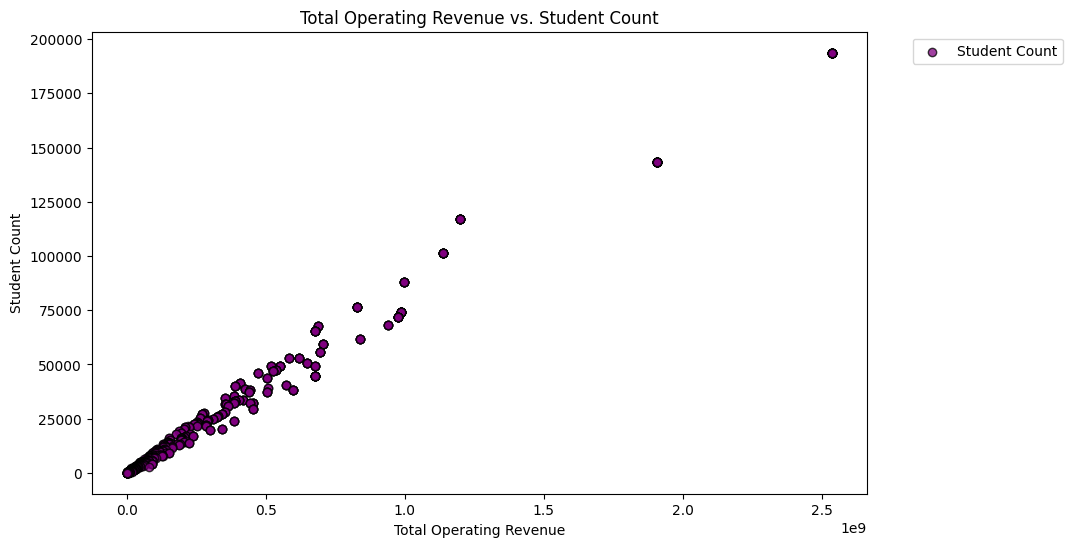

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Total Operating Revenue', y='Student Count', data=sort_score_finance_complete, color="purple", edgecolors="black", alpha=0.75, marker='o')

# Set plot labels and title
plt.xlabel('Total Operating Revenue')
plt.ylabel('Student Count')
plt.title('Total Operating Revenue vs. Student Count')

# Display the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

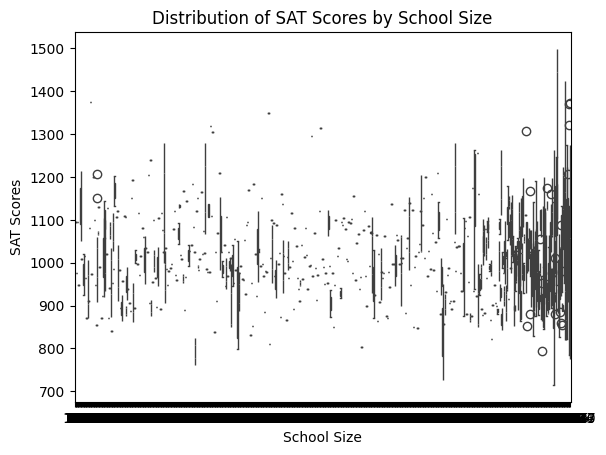

In [36]:
sns.boxplot(x='Student Count', y='SAT Total', data=sort_score_finance_complete)
plt.xlabel('School Size')
plt.ylabel('SAT Scores')
plt.title('Distribution of SAT Scores by School Size')
plt.show()

In [37]:
sort_score_finance_complete["per student budget"] = sort_score_finance_complete['Total Operating Revenue']/sort_score_finance_complete['Student Count']
sort_score_finance_complete

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5,13087.072783
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3,13087.072783
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6,13087.072783
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0,13087.072783
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8,13087.072783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,cherokee isd,2022,2886105.0,126,Cherokee School,San Saba County,15.0,San Angelo,537.0,558.0,1095.0,22.3,21.3,27.3,21.3,23.3,22905.595238
1219,priddy isd,2022,2489662.0,123,Priddy School,Mills County,12.0,Waco,489.0,537.0,1026.0,14.8,18.9,16.9,18.6,17.4,20241.154472
1220,richland springs isd,2022,2741851.0,120,Richland Springs School,San Saba County,15.0,San Angelo,492.0,483.0,975.0,19.0,17.0,19.6,17.8,18.4,22848.758333
1221,southland isd,2022,3197189.0,114,Southland School,Garza County,17.0,Lubbock,570.0,526.0,1096.0,17.0,17.0,19.0,18.7,18.0,28045.517544


In [38]:
sort_score_finance_complete.loc[:,"per student budget"] = sort_score_finance_complete["per student budget"].replace(".","").astype(int)
sort_score_finance_complete

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5,13087
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3,13087
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6,13087
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0,13087
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8,13087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,cherokee isd,2022,2886105.0,126,Cherokee School,San Saba County,15.0,San Angelo,537.0,558.0,1095.0,22.3,21.3,27.3,21.3,23.3,22905
1219,priddy isd,2022,2489662.0,123,Priddy School,Mills County,12.0,Waco,489.0,537.0,1026.0,14.8,18.9,16.9,18.6,17.4,20241
1220,richland springs isd,2022,2741851.0,120,Richland Springs School,San Saba County,15.0,San Angelo,492.0,483.0,975.0,19.0,17.0,19.6,17.8,18.4,22848
1221,southland isd,2022,3197189.0,114,Southland School,Garza County,17.0,Lubbock,570.0,526.0,1096.0,17.0,17.0,19.0,18.7,18.0,28045


In [39]:
sort_score_finance_complete.sort_values("per student budget", ascending= False)

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget
1132,wink-loving isd,2022,20782236.0,407,Wink HS,Winkler County,18.0,Midland,433.0,430.0,863.0,15.8,17.1,17.6,17.0,17.1,51062
1206,blackwell cisd,2022,7790469.0,155,Blackwell School,Nolan County,14.0,Abilene,635.0,625.0,1260.0,17.7,20.4,20.8,21.2,20.3,50261
1202,boys ranch isd,2022,7696618.0,178,Boys Ranch HS,Oldham County,16.0,Amarillo,524.0,482.0,1006.0,18.3,19.6,21.3,19.9,19.9,43239
1214,benjamin isd,2022,5134623.0,133,Benjamin School,Knox County,9.0,Wichita Falls,527.0,523.0,1050.0,20.2,21.7,20.5,19.2,20.7,38606
1149,rankin isd,2022,11853856.0,312,Rankin School,Upton County,18.0,Midland,419.0,422.0,841.0,13.0,14.6,14.8,16.4,15.0,37993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,wylie isd,2022,48433114.0,5097,Wylie HS,Taylor County,14.0,Abilene,582.0,560.0,1142.0,21.9,22.3,24.9,23.2,23.2,9502
627,wylie isd,2022,48433114.0,5097,Wylie East HS,Collin County,10.0,Richardson,528.0,530.0,1058.0,23.9,23.1,25.8,23.9,24.2,9502
872,leadership prep school,2022,12471077.0,1344,Leadership Prep School Secondary,Denton County,10.0,Richardson,553.0,538.0,1091.0,24.8,22.3,25.6,23.9,24.4,9279
829,denver city isd,2022,14494234.0,1596,Denver City HS,Yoakum County,17.0,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0,9081


In [40]:
spending_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
labels = ["<$10,000", "$10,000-20,000", "$20,000-30,000", "$30,000-40,000", "$40,000-50,000", "$50,000-60,000"]

In [41]:
school_spending_df = sort_score_finance_complete.copy()
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["per student budget"],
                                                            spending_bins, labels=labels, include_lowest=True)
school_spending_df

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget,Spending Ranges (Per Student)
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5,13087,"$10,000-20,000"
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3,13087,"$10,000-20,000"
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6,13087,"$10,000-20,000"
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0,13087,"$10,000-20,000"
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8,13087,"$10,000-20,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,cherokee isd,2022,2886105.0,126,Cherokee School,San Saba County,15.0,San Angelo,537.0,558.0,1095.0,22.3,21.3,27.3,21.3,23.3,22905,"$20,000-30,000"
1219,priddy isd,2022,2489662.0,123,Priddy School,Mills County,12.0,Waco,489.0,537.0,1026.0,14.8,18.9,16.9,18.6,17.4,20241,"$20,000-30,000"
1220,richland springs isd,2022,2741851.0,120,Richland Springs School,San Saba County,15.0,San Angelo,492.0,483.0,975.0,19.0,17.0,19.6,17.8,18.4,22848,"$20,000-30,000"
1221,southland isd,2022,3197189.0,114,Southland School,Garza County,17.0,Lubbock,570.0,526.0,1096.0,17.0,17.0,19.0,18.7,18.0,28045,"$20,000-30,000"


In [42]:
#  Calculate averages for the desired columns. 
spending_sat_total = school_spending_df.groupby(["Spending Ranges (Per Student)"])["SAT Total"].mean()
spending_act_compos = school_spending_df.groupby(["Spending Ranges (Per Student)"])["ACT Compos"].mean()


C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\3183170057.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_sat_total = school_spending_df.groupby(["Spending Ranges (Per Student)"])["SAT Total"].mean()
C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\3183170057.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_act_compos = school_spending_df.groupby(["Spending Ranges (Per Student)"])["ACT Compos"].mean()


In [43]:
spending_summary = pd.DataFrame({
    "average total SAT score": spending_sat_total,
    "average act compos": spending_act_compos,

})

# Display results
spending_summary

,average total SAT score,average act compos
Spending Ranges (Per Student),,
"<$10,000",1062.936170,22.917021
"$10,000-20,000",1002.953386,20.272120
"$20,000-30,000",1034.666667,19.183333
"$30,000-40,000",979.333333,17.850000
"$40,000-50,000",1006.000000,19.900000
"$50,000-60,000",1061.500000,18.700000


In [55]:
# Define the bin edges
size_bins = [0, 500, 1000, 5000, 10000, 50000, 100000, 200000]

# Create labels for the bins
labels = ['<500', '501-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000', '100001-200000']

In [56]:
school_size_df = sort_score_finance_complete.copy()
school_size_df["school size"] = pd.cut(school_size_df["Student Count"],
                                                            size_bins, labels=labels, include_lowest=True)

school_size_df

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget,school size
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5,13087,100001-200000
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3,13087,100001-200000
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6,13087,100001-200000
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0,13087,100001-200000
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8,13087,100001-200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,cherokee isd,2022,2886105.0,126,Cherokee School,San Saba County,15.0,San Angelo,537.0,558.0,1095.0,22.3,21.3,27.3,21.3,23.3,22905,<500
1219,priddy isd,2022,2489662.0,123,Priddy School,Mills County,12.0,Waco,489.0,537.0,1026.0,14.8,18.9,16.9,18.6,17.4,20241,<500
1220,richland springs isd,2022,2741851.0,120,Richland Springs School,San Saba County,15.0,San Angelo,492.0,483.0,975.0,19.0,17.0,19.6,17.8,18.4,22848,<500
1221,southland isd,2022,3197189.0,114,Southland School,Garza County,17.0,Lubbock,570.0,526.0,1096.0,17.0,17.0,19.0,18.7,18.0,28045,<500


In [57]:
size_sat_total = school_size_df.groupby(["school size"])["SAT Total"].mean()
size_act_compos = school_size_df.groupby(["school size"])["ACT Compos"].mean()

C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\2456648537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sat_total = school_size_df.groupby(["school size"])["SAT Total"].mean()
C:\Users\riahk\AppData\Local\Temp\ipykernel_29204\2456648537.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_act_compos = school_size_df.groupby(["school size"])["ACT Compos"].mean()


In [58]:
size_summary = pd.DataFrame({
    "average total SAT score": size_sat_total,
    "average act compos": size_act_compos,

})

# Display results
size_summary

,average total SAT score,average act compos
school size,,
<500,1012.940171,19.560684
501-1000,1032.919463,20.254362
1001-5000,1001.293578,20.136391
5001-10000,1002.078652,20.484270
10001-50000,1003.537092,20.726409
50001-100000,1013.605263,20.892982
100001-200000,973.233333,19.840000


In [59]:
sort_score_finance_complete["school size"] = pd.cut(sort_score_finance_complete["Student Count"],
                                           size_bins, labels=labels,
                                           include_lowest=True)


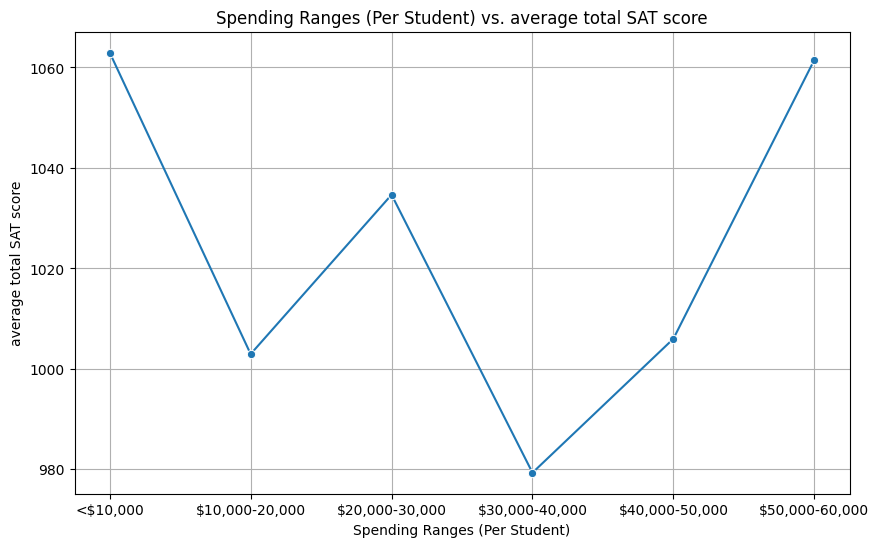

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Spending Ranges (Per Student)', y='average total SAT score', data=spending_summary, marker='o')

# Set plot labels and title
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('average total SAT score')
plt.title('Spending Ranges (Per Student) vs. average total SAT score')
plt.grid(True)
# save
plt.savefig("images/spendingvsat.png")
# Show the plot
plt.show()

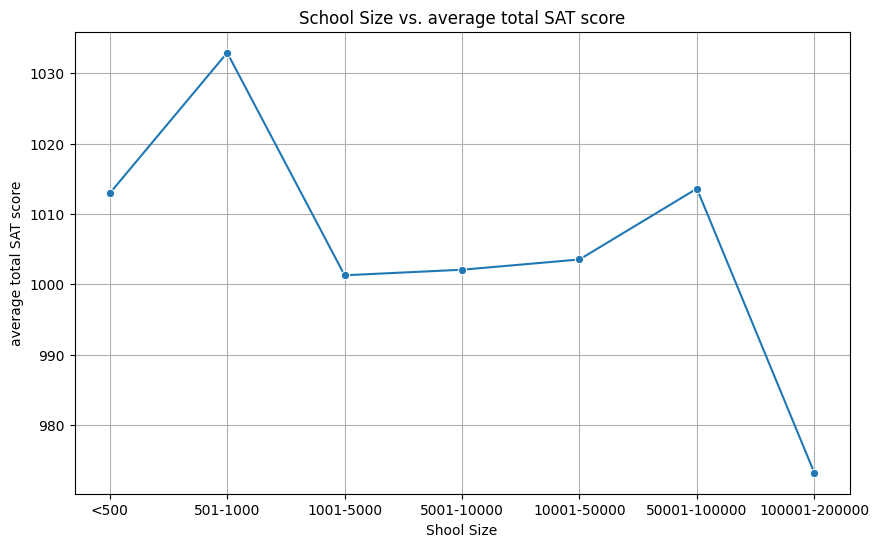

In [61]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='school size', y='average total SAT score', data=size_summary, marker='o')

# Set plot labels and title
plt.xlabel('Shool Size')
plt.ylabel('average total SAT score')
plt.title('School Size vs. average total SAT score')
plt.grid(True)
# save
plt.savefig("images/sizevsat.png")
# Show the plot
plt.show()

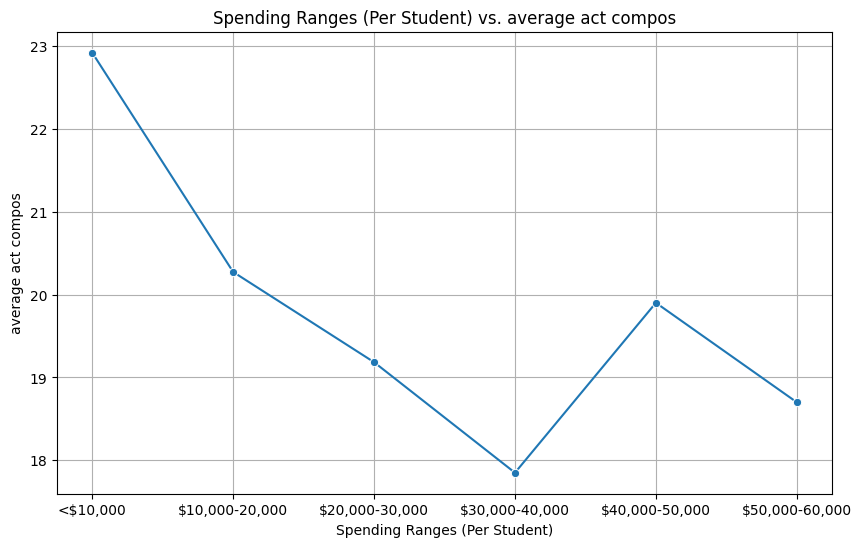

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Spending Ranges (Per Student)', y='average act compos', data=spending_summary, marker='o')

# Set plot labels and title
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('average act compos')
plt.title('Spending Ranges (Per Student) vs. average act compos')
plt.grid(True)
# save
plt.savefig("images/spendingvact.png")

# Show the plot
plt.show()

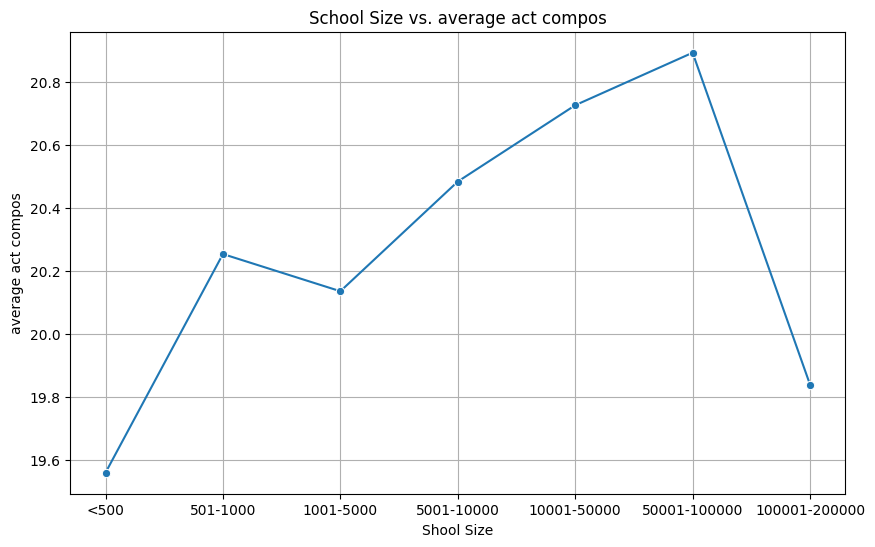

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='school size', y='average act compos', data=size_summary, marker='o')

# Set plot labels and title
plt.xlabel('Shool Size')
plt.ylabel('average act compos')
plt.title('School Size vs. average act compos')
plt.grid(True)
# save
plt.savefig("images/sizevact.png")
# Show the plot
plt.show()